In [ ]:
# Keşifsel Veri Analizi (EDA)
#Bu bölümde HMEQ veri seti üzerinden temel veri yapısı incelenecek, eksik veriler analiz edilecek, değişken dağılımları ve korelasyonlar görselleştirilecektir.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Veri setini yükleme
df = pd.read_csv("hmeq.csv")

#Genel Bilgiler
print("Veri seti boyutu:", df.shape)
print("\nVeri tipleri ve eksik değer durumu:\n")
print(df.info())


Veri seti boyutu: (5960, 13)

Veri tipleri ve eksik değer durumu:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
None


In [ ]:
# Eksik Veri Analizi
missing = df.isnull().sum()
missing_percent = 100 * missing / len(df)
missing_df = pd.DataFrame({
    'Eksik Değer Sayısı': missing,
    'Yüzde (%)': missing_percent
}).sort_values(by='Eksik Değer Sayısı', ascending=False)

missing_df[missing_df["Eksik Değer Sayısı"] > 0]


,Eksik Değer Sayısı,Yüzde (%)
DEBTINC,1267,21.258389
DEROG,708,11.879195
DELINQ,580,9.731544
MORTDUE,518,8.691275
YOJ,515,8.640940
NINQ,510,8.557047
CLAGE,308,5.167785
JOB,279,4.681208
REASON,252,4.228188
CLNO,222,3.724832


In [10]:
#İstatistiksel Özet
df.describe().T


,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


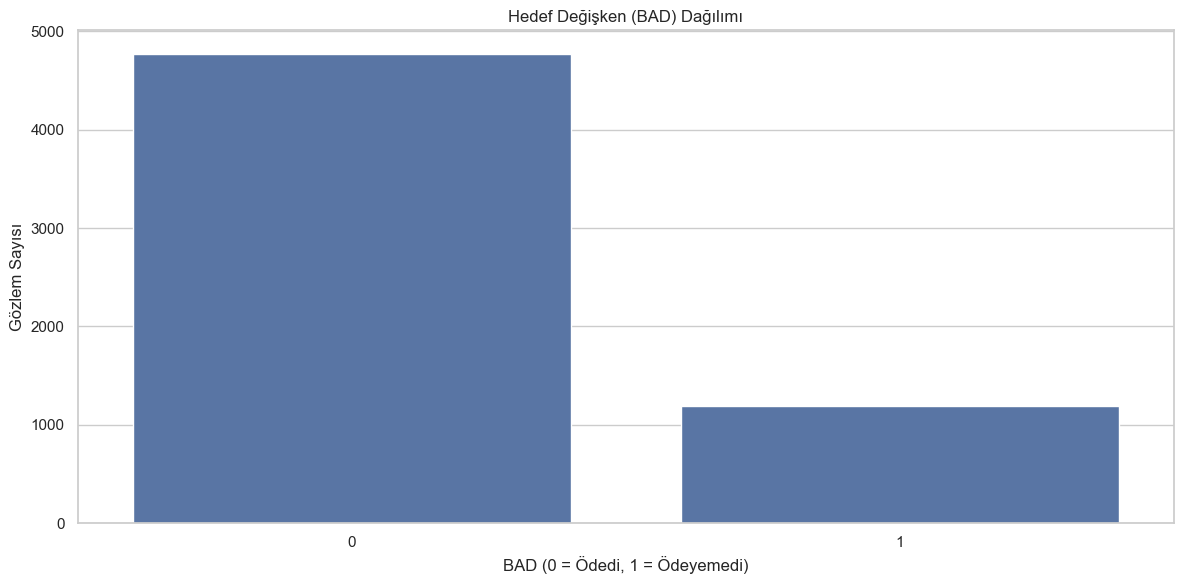

In [17]:
# Hedef Değişken Dağılımı
sns.countplot(x='BAD', data=df)
plt.title("Hedef Değişken (BAD) Dağılımı")
plt.xlabel("BAD (0 = Ödedi, 1 = Ödeyemedi)")
plt.ylabel("Gözlem Sayısı")
plt.tight_layout()
plt.show()


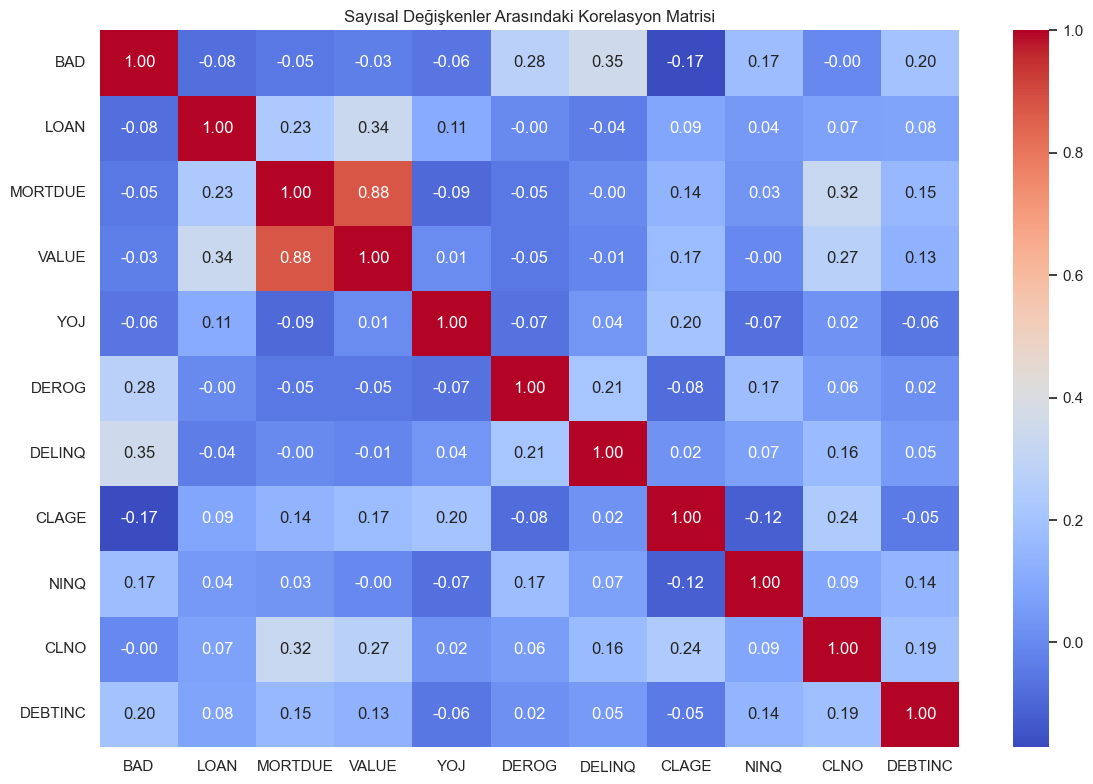

In [14]:
#Korelasyon Matrisi (Sayısal Değişkenler)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Sayısal Değişkenler Arasındaki Korelasyon Matrisi")
plt.tight_layout()
plt.show()


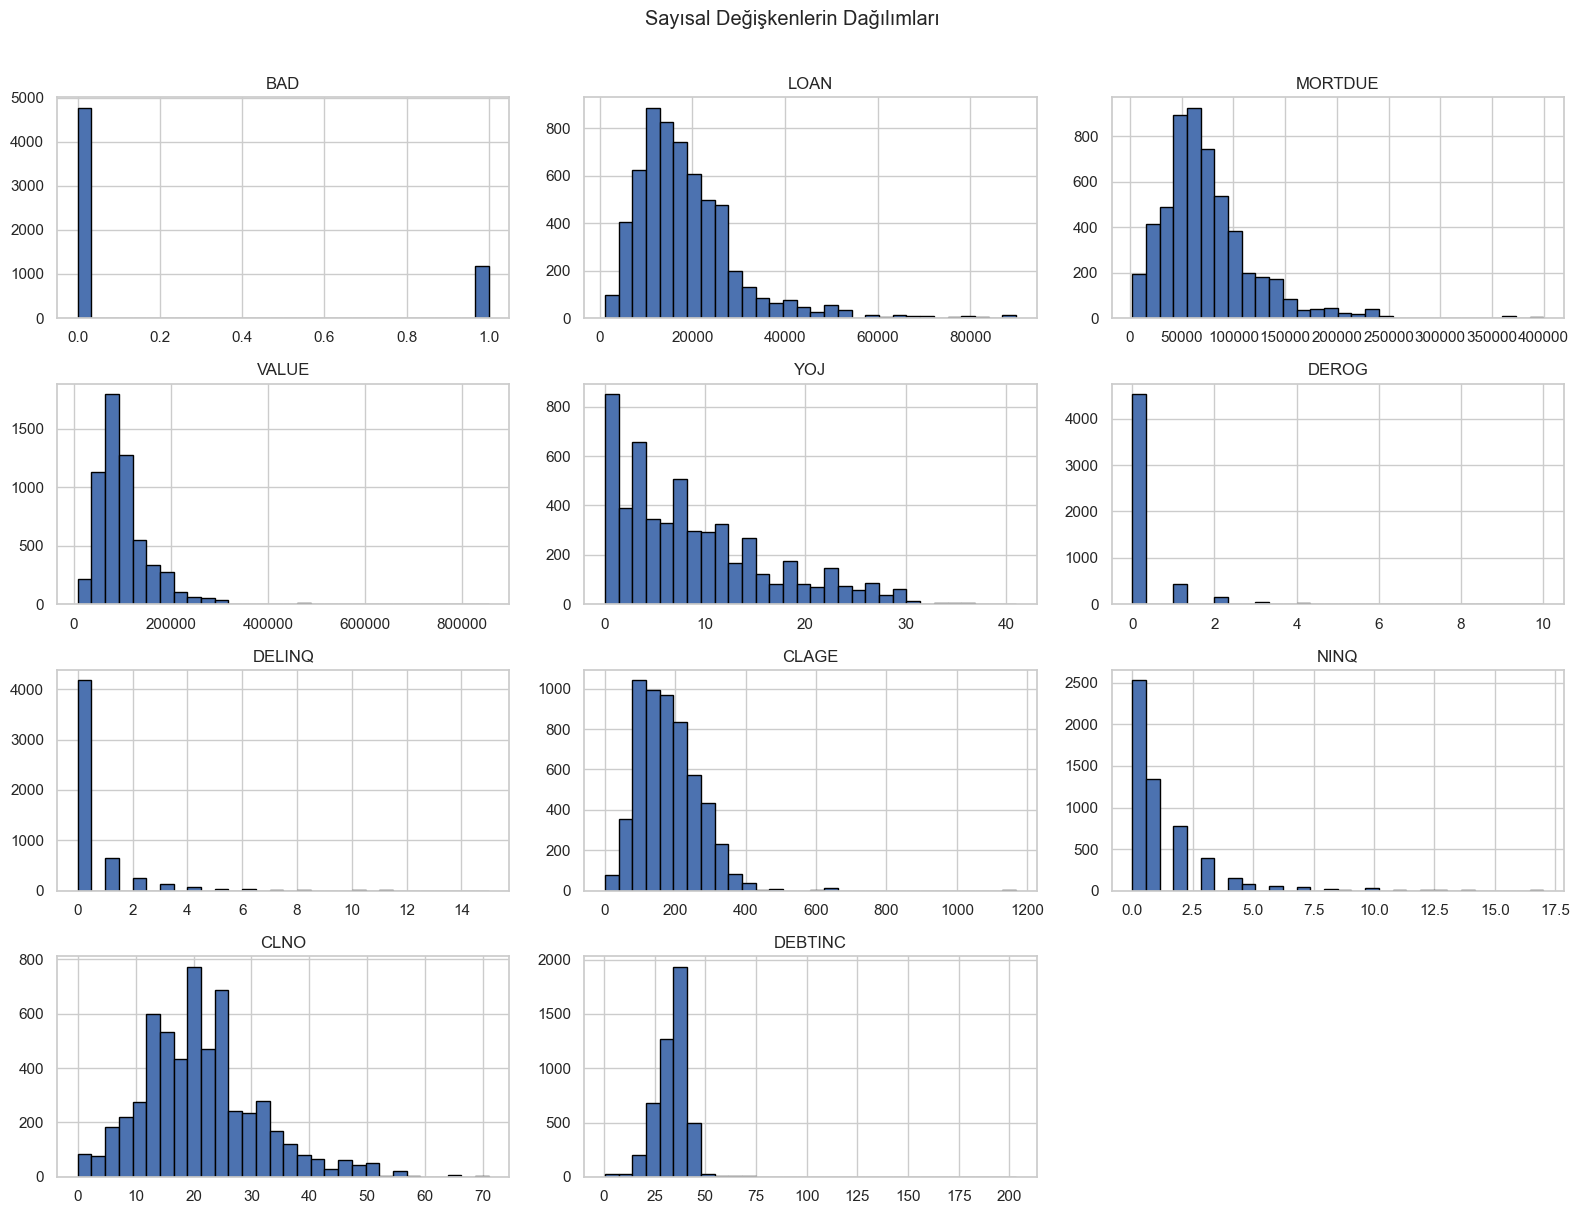

In [15]:
#Sayısal Değişkenlerin Dağılımları
df[numeric_cols].hist(bins=30, figsize=(16, 12), edgecolor='black')
plt.suptitle("Sayısal Değişkenlerin Dağılımları", y=1.01)
plt.tight_layout()
plt.show()


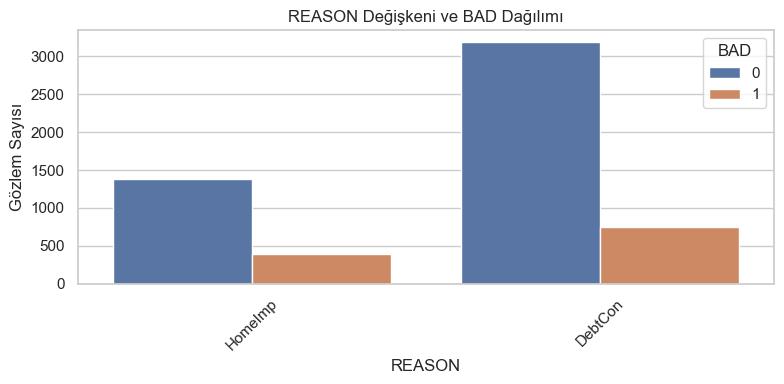

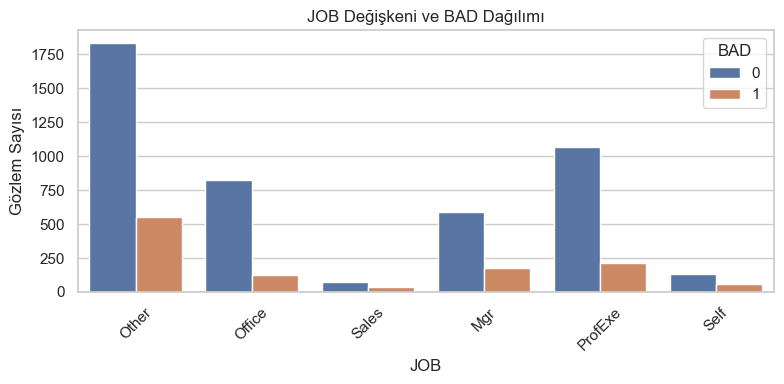

In [16]:
#Kategorik Değişkenlerin BAD ile İlişkisi
categorical_cols = ['REASON', 'JOB']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='BAD')
    plt.title(f"{col} Değişkeni ve BAD Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Gözlem Sayısı")
    plt.xticks(rotation=45)
    plt.legend(title='BAD')
    plt.tight_layout()
    plt.show()
